In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parking = pd.read_excel ("parking.xls")
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [3]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [4]:
parking["Bldg City"].value_counts()

WASHINGTON         487
EL PASO             89
LAREDO              81
LAKEWOOD            79
SPRINGFIELD         79
                  ... 
SAFFORD              1
WOODVILLE            1
APACHE JUNCTION      1
SANTA CLARITA        1
MADAWASKA            1
Name: Bldg City, Length: 1900, dtype: int64

In [5]:
parking["Bldg State"].value_counts()

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
WA    242
CO    242
IL    241
MI    235
AZ    222
GA    218
NC    212
MO    209
OH    201
IN    157
TN    152
MT    150
LA    149
NJ    146
KY    137
NM    136
OK    130
MA    127
AL    124
WI    122
WV    106
OR    105
MN     98
ME     97
UT     96
SC     95
MS     87
AR     83
ND     80
VT     75
NV     75
KS     74
IA     74
SD     66
ID     63
CT     58
NE     51
WY     45
NH     39
DE     28
RI     27
Name: Bldg State, dtype: int64

In [6]:
parking["Bldg Status"].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [7]:
parking["Property Type"].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [8]:
parking["Total Parking Spaces"].value_counts()

0       2841
2        387
4        248
3        234
5        224
        ... 
2101       1
188        1
196        1
244        1
803        1
Name: Total Parking Spaces, Length: 499, dtype: int64

In [9]:
parking["Owned/Leased"].value_counts()

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

In [10]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

### Q1. What is the distribution or values for owned/leased

<BarContainer object of 9060 artists>

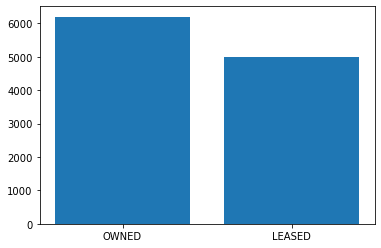

In [11]:
plt.bar(parking["Owned/Leased"],parking["Total Parking Spaces"])
# Count based on total parking space

In [12]:
owned_leased = pd.pivot_table (parking, index= "Owned/Leased", values = "Total Parking Spaces", aggfunc = 'count')
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


<AxesSubplot:xlabel='Owned/Leased'>

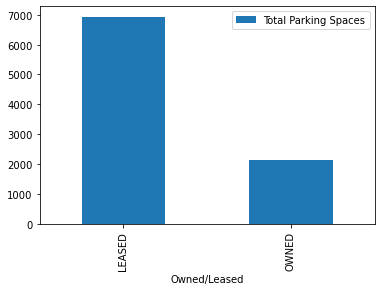

In [13]:
owned_leased.plot(kind = "bar")

<BarContainer object of 2 artists>

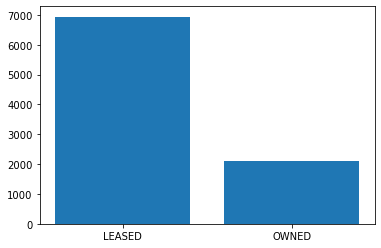

In [14]:
plt.bar(owned_leased.index, owned_leased ["Total Parking Spaces"])
# Same as above

### Q2 In which building state parking situation is in excess - Put it in Order

In [15]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [16]:
excess_parking = pd.pivot_table (parking, index = "Bldg State", values = "Total Parking Spaces", columns = "Bldg Status" )
excess_parking.head()

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.0
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.2


In [17]:
excess_parking = excess_parking [excess_parking.EXCESS>0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

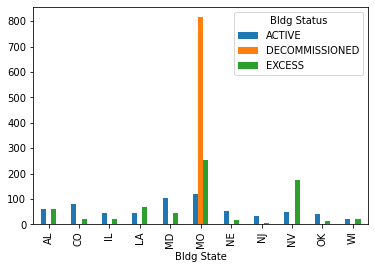

In [18]:
excess_parking.plot (kind = "bar")

<BarContainer object of 11 artists>

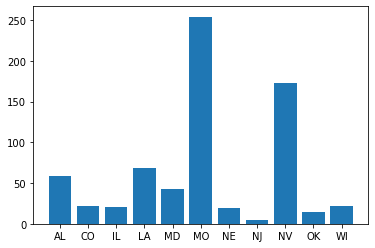

In [19]:
plt.bar (excess_parking.index, excess_parking.EXCESS)

In [20]:
excess_parking_sorted = excess_parking.EXCESS.sort_values()
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

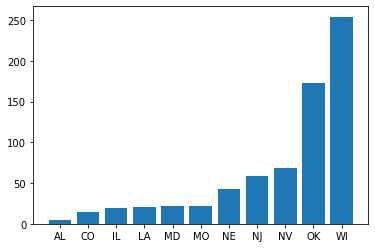

In [21]:
plt.bar (excess_parking.index, excess_parking_sorted)

### Q3 Building cities that have been decommissioned along with total parking

In [22]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [23]:
decom_parking_city = parking [parking ["Bldg Status"] == "DECOMMISSIONED"]
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [24]:
decom_parking_city = decom_parking_city[decom_parking_city["Total Parking Spaces"] > 0]
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


<BarContainer object of 2 artists>

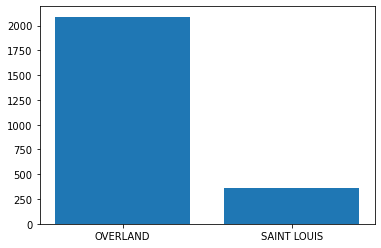

In [25]:
plt.bar (decom_parking_city["Bldg City"], decom_parking_city ["Total Parking Spaces"])

### Q4 In which type of Property parking space is in excess

In [29]:
excess_parking_property = pd.pivot_table (parking [parking["Bldg Status"] == "EXCESS"], index = "Property Type", values = "Total Parking Spaces")
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


### Q5 Where is more active parking - Owned/Leased

In [30]:
active_parking = pd.pivot_table (parking[parking["Bldg Status"] == "ACTIVE"], index = "Owned/Leased", values = "Total Parking Spaces")
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


### Q6 percentage

In [31]:
active_parking ["Total Parking Spaces"].sum()

119.0733457634346

In [34]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [38]:
active_parking['%Contri']= active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


### Q7 State with more leased parking

In [39]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [44]:
state_leased_parking = pd.pivot_table (parking[parking["Owned/Leased"] == "LEASED"], index = "Bldg State", values = "Total Parking Spaces")
state_leased_parking.head()

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727


<BarContainer object of 49 artists>

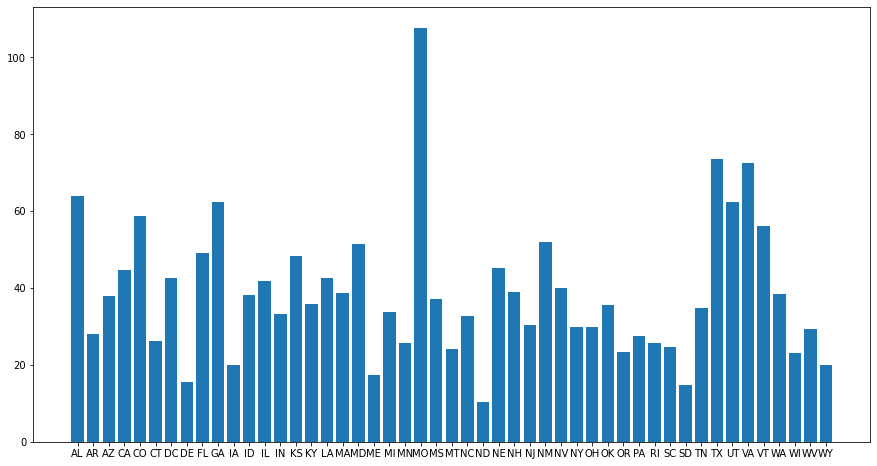

In [46]:
plt.figure(figsize = (15,8))
plt.bar (state_leased_parking.index, state_leased_parking ["Total Parking Spaces"])

### Q7 Which Property Type has more Active Parking

In [47]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [48]:
active_parking_property = parking[parking["Bldg Status"] == "ACTIVE"]

In [68]:
k  = active_parking_property['Property Type'].value_counts()
k

BUILDING     8526
STRUCTURE     336
LAND          119
Name: Property Type, dtype: int64

In [69]:
k = k.to_frame(name = "values")

In [70]:
k['values']

BUILDING     8526
STRUCTURE     336
LAND          119
Name: values, dtype: int64

<BarContainer object of 3 artists>

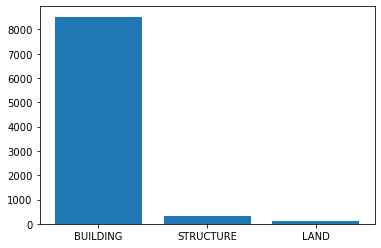

In [71]:
plt.bar (k.index, k["values"])

### Q8 How is the distribution of parking in city by property Type

In [73]:
dist_property = pd.pivot_table (parking, index = "Property Type", values = "Total Parking Spaces", aggfunc = "count")
dist_property

,Total Parking Spaces
Property Type,
BUILDING,8602
LAND,119
STRUCTURE,339


<AxesSubplot:xlabel='Property Type'>

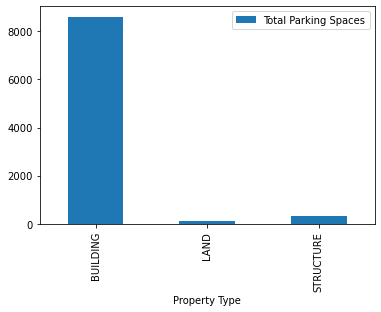

In [75]:
dist_property.plot (kind = "bar")